
# Poblacion mundial en el año 2020
## Análisis comparativo de la densidad de población y el territorio de países

# Introducción
### En el presente trabajo vamos a visualizar información referida a  población, extensión territorial y cantidad de habitantes por kilómetro cuadrado de los países del mundo durante el año 2020 con el objetivo de comprender como estás variables se relacionan en cada uno de ellos.


# Objetivos
### - Conocer cuáles son los diez países con mayor y menor población en 2020
### - Determinar si los países de mayor población y mayor superficie de territorio son aquellos de mayor densidad de población por kilómetro cuadrado.
### -Visualizar aspectos destacados y/o comunes de los paises con mayor densidad de población


# Objeto de Análisis : 
### dataset descargado de https://www.kaggle.com/tanuprabhu/population-by-country-2020





# Herramientas de Trabajo -  Librerías: 
### pandas, math, matplotlib, numpy

In [1]:
#impotamos las liberías que vamos a utilizar a lo largo del trabajo para la presentación final
import pandas as pd
import matplotlib.pyplot as plt
import math as mth
import numpy as np

# Conociendo nuestro set de datos

In [4]:
#traemos el set desde el modo lectura para constituir nuestro data frame, conocer sus carácterísticas y empezar a analizarlo
path = 'data/population_by_country_2020.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


# Verificación
### Antes de comenzar a visualizar los dtose vamos a hacer una pequeña prueba para saber si la información del dataframe es certera

In [11]:
#vemos las primeras diez entradas las cuales van a ser nuestra muestra para trabajar a lo largo de la presentación
df.head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212821986,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,206984347,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164972348,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145945524,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,129166028,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %


In [12]:
# aplicando una función vamos a determinar si los valores de la columna 'Density (P/Km²)' 
# se corresponden con el valor obtenido del cociente entre las columnas 'Population (2020)' y 'Land Area (Km²)'
#creamos la funcion
def resultado_cociente():
   x = (df.loc[:,  'Population (2020)'])
   y = (df.loc[:, 'Land Area (Km²)'])
   z = x // y
   return z.head(10)

resultado_cociente()

0     153.0
1     464.0
2      36.0
3     151.0
4     287.0
5      25.0
6     227.0
7    1267.0
8       8.0
9      66.0
dtype: float64

In [8]:
# a continuacion vamos a comparar el cociente de las primeras diez entradas de las columnas'Population (2020)' y 'Land Area (Km²)' con la columna 'Density (P/Km²)'  
# utilizando el condicional "==" que nos arrojara el valor True o False por tratarse de datos de tipo booleano

resultado_cociente() == df.loc[:, 'Density (P/Km²)'].head(10)

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7    False
8    False
9     True
dtype: bool

In [9]:
#otra forma de llegar al mismo resultado es a traves de una operacion aritmetica a la cual se le aplica el condicional
(df.loc[:,  'Population (2020)'].head(10))//(df.loc[:, 'Land Area (Km²)'].head(10)) == (df.loc[:, 'Density (P/Km²)'].head(10))

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7    False
8    False
9     True
dtype: bool

### Conclusión
#### 7 de 10 datos son verdaderos, los tres datos que no son exactamente iguales tienen una diferencia entre uno y dos puntos con el parámetro del condicional, por lo tanto vamos a considerar que los datos son certeros y nos sirven para nuestro análisis

# Muestras
### Comenzamos a visualizar el dataframe y a responder la primera pregunta acerca de cuales son los países más y menos poblados del mundo en 2020. Para esto vamos a aplicar el metodo sort_values


In [22]:
#una mencion especial para Argentina
df.loc[df["Country (or dependency)"] == "Argentina"]

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
31,Argentina,45267449,0.93 %,415097,17,2736690,4800.0,2.3,32,93 %,0.58 %


## cumplimos el primer objetivo:
### - Conocer cuáles son los diez países con mayor y menor población en 2020

In [16]:
#Ahora si comenzamos
#los paises mas poblados
df.sort_values(['Population (2020)'], ascending=[False]).head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
5,Brazil,212821986,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
6,Nigeria,206984347,2.58 %,5175990,226,910770,-60000.0,5.4,18,52 %,2.64 %
7,Bangladesh,164972348,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %
8,Russia,145945524,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
9,Mexico,129166028,1.06 %,1357224,66,1943950,-60000.0,2.1,29,84 %,1.65 %


In [17]:
#los paises menos poblados
df.sort_values(['Population (2020)'], ascending=[False]).tail(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
225,Wallis & Futuna,11203,-1.69 %,-193,80,140,NaN,N.A.,N.A.,0 %,0.00 %
226,Nauru,10836,0.63 %,68,541,20,NaN,N.A.,N.A.,N.A.,0.00 %
227,Saint Barthelemy,9882,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
228,Saint Helena,6080,0.30 %,18,16,390,NaN,N.A.,N.A.,27 %,0.00 %
229,Saint Pierre & Miquelon,5789,-0.48 %,-28,25,230,NaN,N.A.,N.A.,100 %,0.00 %
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %


# Territorio o superficie

In [18]:
# paises con mayor territorio o superficie en kilometros cuadrados
df.sort_values(['Land Area (Km²)'], ascending=[False]).head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
8,Russia,145945524,0.04 %,62206,9,16376870,182456.0,1.8,40,74 %,1.87 %
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
38,Canada,37799407,0.89 %,331107,4,9093510,242032.0,1.5,41,81 %,0.48 %
5,Brazil,212821986,0.72 %,1509890,25,8358140,21200.0,1.7,33,88 %,2.73 %
54,Australia,25550683,1.18 %,296686,3,7682300,158246.0,1.8,38,86 %,0.33 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
31,Argentina,45267449,0.93 %,415097,17,2736690,4800.0,2.3,32,93 %,0.58 %
63,Kazakhstan,18815231,1.21 %,225280,7,2699700,-18000.0,2.8,31,58 %,0.24 %
32,Algeria,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %


In [21]:
# paises con menor territorio o superficie en kilometros cuadrados
df.sort_values(['Land Area (Km²)'], ascending=[False]).tail(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
205,Bermuda,62237,-0.36 %,-228,1246,50,NaN,N.A.,N.A.,97 %,0.00 %
212,Sint Maarten,42960,1.15 %,488,1261,34,NaN,N.A.,N.A.,96 %,0.00 %
224,Tuvalu,11817,1.25 %,146,393,30,NaN,N.A.,N.A.,62 %,0.00 %
166,Macao,650846,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
227,Saint Barthelemy,9882,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
226,Nauru,10836,0.63 %,68,541,20,NaN,N.A.,N.A.,N.A.,0.00 %
218,Gibraltar,33689,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %
213,Monaco,39290,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %


# Densidad de poblacion por kilometro cuadrado

In [19]:
# paises con mayor mayor densidad de poblacion por kilometro cuadrado
df.sort_values(['Density (P/Km²)'], ascending=[False]).head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
213,Monaco,39290,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
166,Macao,650846,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
113,Singapore,5858322,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
103,Hong Kong,7507523,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
218,Gibraltar,33689,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
151,Bahrain,1711057,3.68 %,60403,2239,760,47800.0,2.0,32,89 %,0.02 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
172,Maldives,542151,1.81 %,9591,1802,300,11370.0,1.9,30,35 %,0.01 %
173,Malta,441750,0.27 %,1171,1380,320,900.0,1.5,43,93 %,0.01 %
7,Bangladesh,164972348,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %


In [20]:
# paises con mayor menor densidad de poblacion por kilometro cuadrado
df.sort_values(['Density (P/Km²)'], ascending=[False]).tail(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
163,Guyana,787215,0.48 %,3786,4,196850,-6000.0,2.5,27,27 %,0.01 %
170,Suriname,587541,0.90 %,5260,4,156000,-1000.0,2.4,29,65 %,0.01 %
38,Canada,37799407,0.89 %,331107,4,9093510,242032.0,1.5,41,81 %,0.48 %
142,Namibia,2548663,1.86 %,46375,3,823290,-4806.0,3.4,22,55 %,0.03 %
54,Australia,25550683,1.18 %,296686,3,7682300,158246.0,1.8,38,86 %,0.33 %
179,Iceland,341628,0.65 %,2212,3,100250,380.0,1.8,37,94 %,0.00 %
135,Mongolia,3287242,1.65 %,53123,2,1553560,-852.0,2.9,28,67 %,0.04 %
169,Western Sahara,599769,2.55 %,14876,2,266000,5582.0,2.4,28,87 %,0.01 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
208,Greenland,56787,0.17 %,98,0,410450,NaN,N.A.,N.A.,87 %,0.00 %


# Visualizar los datos de forma grafica
### Para contestar la segunda pregunta vamos a visualizar la informacion de las ultimas dos entradas en graficos de barra


In [34]:
#vamos a comenzar por crear listas que nos sirvan de parametros para la grafica
country_or_dependency = df.loc[0:9, "Country (or dependency)"]
population = df.loc[0:9, "Population (2020)"]
territory = df.loc[0:9, "Land Area (Km²)"]
density = df.loc[0:9, "Density (P/Km²)"]

In [36]:
print(country_or_dependency)
print(population)
print(territory)
print(density)

0            China
1            India
2    United States
3        Indonesia
4         Pakistan
5           Brazil
6          Nigeria
7       Bangladesh
8           Russia
9           Mexico
Name: Country (or dependency), dtype: object
0    1440297825
1    1382345085
2     331341050
3     274021604
4     221612785
5     212821986
6     206984347
7     164972348
8     145945524
9     129166028
Name: Population (2020), dtype: int64
0     9388211
1     2973190
2     9147420
3     1811570
4      770880
5     8358140
6      910770
7      130170
8    16376870
9     1943950
Name: Land Area (Km²), dtype: int64
0     153
1     464
2      36
3     151
4     287
5      25
6     226
7    1265
8       9
9      66
Name: Density (P/Km²), dtype: int64


# Poblacion
### el primer grafico  es en relacion a la poblacion de cada pais 


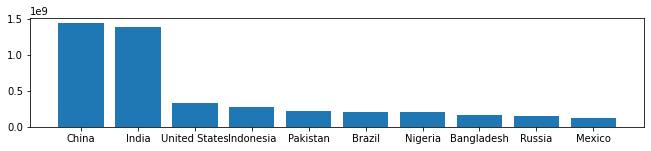

In [45]:
#ya definidos los parametros con nuestro codigo vamos a ir creando los graficos


#determinamos el tamano de la grafica
plt.figure(figsize=(11,2))
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('population')
#Colocamos una etiqueta en el eje X
ax.set_title('Country (or dependency)')
#Creamos el grafica de barras utilizando 'Country (or dependency)' como eje X y 'population' como eje y.
plt.bar(country_or_dependency, population)
plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

# Territorio
### el segundo es en relacion al territorio o superficie de cada pais


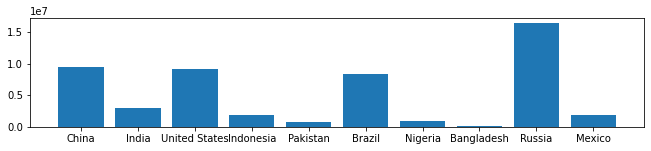

In [46]:
#utilizamos el mismo codigo cambiando los parametros

plt.figure(figsize=(11,2))
ax.set_ylabel('territory')
ax.set_title('Country (or dependency)')
plt.bar(country_or_dependency, territory)
plt.savefig('barras_simple.png')
plt.show()

# Densidad de poblacion
### el tercero es en relacion a la densidad de poblacion por kilometro cuadrado


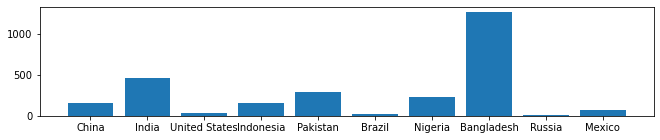

In [47]:
#repetimos la secuencia de la entrada anterior

plt.figure(figsize=(11,2))
ax.set_ylabel('density')
ax.set_title('Country (or dependency)')
plt.bar(country_or_dependency, density)
plt.savefig('barras_simple.png')
plt.show()

# Conclusiones en relación al segundo objetivo
#### ( Determinar si los países de mayor población y mayor superficie de territorio son aquellos de mayor densidad de población por kilómetro cuadrado.)

## De la información arrojada por el dataframe y sistematizada en los gráficos de barra podemos concluir que aquellos países con menor superficie o territorio son los que poseen mayor densidad de población por kilómetro cuadrado, en una relación inversamente proporcional entre estos dos parámetros.

# Conclusiones en relacion al tercer objetivo
#### (Visualizar aspectos destacados y/o comunes de los paises con mayor densidad de población)



In [49]:
#vamos a ampliar la muestra a veinte paises para contar con mas informacion
df.sort_values(['Density (P/Km²)'], ascending=[False]).head(20)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
213,Monaco,39290,0.71 %,278,26337,1,NaN,N.A.,N.A.,N.A.,0.00 %
166,Macao,650846,1.39 %,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
113,Singapore,5858322,0.79 %,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
103,Hong Kong,7507523,0.82 %,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
218,Gibraltar,33689,-0.03 %,-10,3369,10,NaN,N.A.,N.A.,N.A.,0.00 %
151,Bahrain,1711057,3.68 %,60403,2239,760,47800.0,2.0,32,89 %,0.02 %
234,Holy See,801,0.25 %,2,2003,0,NaN,N.A.,N.A.,N.A.,0.00 %
172,Maldives,542151,1.81 %,9591,1802,300,11370.0,1.9,30,35 %,0.01 %
173,Malta,441750,0.27 %,1171,1380,320,900.0,1.5,43,93 %,0.01 %
7,Bangladesh,164972348,1.01 %,1643222,1265,130170,-369501.0,2.1,28,39 %,2.11 %


# Como características comunes a estos países podemos mencionar:
### - la mayoría  se encuentra en el continente asiático en la región oeste y central de medio oriente;
### -la mayoría son dependencias (territorios o administraciones) de otros países;
### - la mayoría se encuentra localizado  geográficamente en islas

# Páginas de consulta y Referencias
### https://www.kaggle.com/
### https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html
### https://thispointer.com/pandas-sort-rows-or-columns-in-dataframe-based-on-values-using-dataframe-sort_values/
### https://es.stackoverflow.com/questions/240398/aumentar-tama%C3%B1o-de-grafica-con-matplotlib

# Fin

# Muchas gracias

# Maria Fernanda Pereyra